In [1]:
# Question-01
# i. Import the suitable libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#ii. Import the Bank.CSV file
df=pd.read_csv('Bank1.csv')
df.head()

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


In [8]:
#iii. Make an array of dataset
data=df.iloc[:,0:8].values
data

array([[48,  2,  3, ...,  2,  2,  1],
       [40,  1,  1, ...,  1,  1,  2],
       [51,  2,  3, ...,  1,  2,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  1],
       [51,  2,  1, ...,  2,  1,  2],
       [46,  2,  1, ...,  1,  2,  1]], shape=(300, 8))

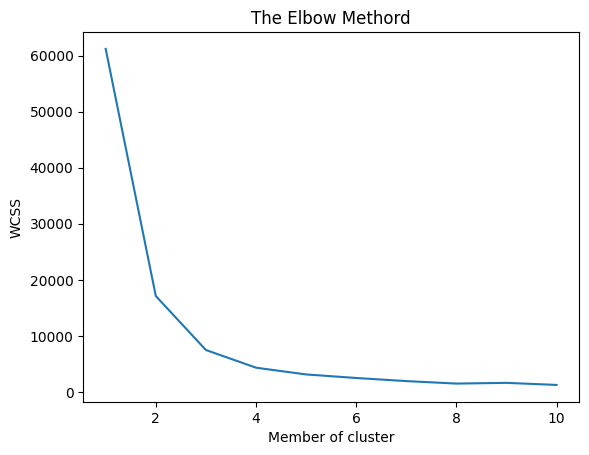

In [14]:
#iv: Create the Elbow chart
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):
    kmeans1=KMeans(n_clusters=i,init='k-means++')
    kmeans1.fit(data)
    inertia.append(kmeans1.inertia_)
    
plt.plot(range(1,11),inertia)
plt.title("The Elbow Methord")
plt.xlabel("Member of cluster")
plt.ylabel("WCSS")
plt.show()

In [15]:
#v: Choose the optimal number of clusters
kmeans1=KMeans(n_clusters=3,init='k-means++')
kmeans1

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [16]:
#vi: Define the clusters for each record
y_kmeans=kmeans1.fit_predict(data)
y_kmeans

array([0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], d

In [18]:
#vii. Concatenate the dataset and the cluster index
pd.concat([df,pd.DataFrame(y_kmeans)],axis=1)

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP,0
0,48,2,3,2,1,2,2,1,0
1,40,1,1,1,1,1,1,2,0
2,51,2,3,1,2,1,2,2,0
3,23,2,1,1,1,2,2,2,2
4,57,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...
295,44,1,3,1,2,2,1,1,0
296,50,1,1,2,1,1,1,1,0
297,64,1,3,2,2,2,2,1,1
298,51,2,1,2,2,2,1,2,0


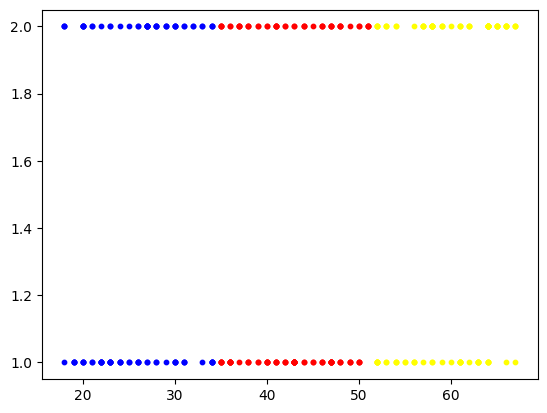

In [24]:
#viii. Visualize the clusters
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=10,c='red')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=10,c='yellow')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=10,c='blue')

In [26]:
#ix: Find the cluster centroid for each cluster
centroids=kmeans1.cluster_centers_
centroids

array([[42.53571429,  1.42857143,  2.19642857,  1.34821429,  1.5       ,
         1.5       ,  1.63392857,  1.55357143],
       [59.66666667,  1.58064516,  2.38709677,  1.2688172 ,  1.44086022,
         1.51612903,  1.69892473,  1.43010753],
       [25.87368421,  1.46315789,  2.44210526,  1.35789474,  1.33684211,
         1.51578947,  1.62105263,  1.63157895]])

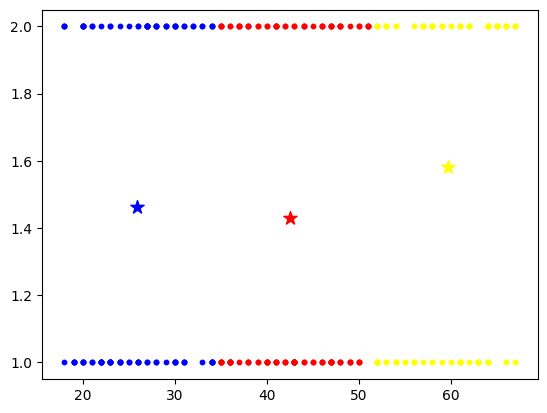

In [29]:
#x: Visualize cluster centroids on scatter plot
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=10,c='red')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=10,c='yellow')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=10,c='blue')


plt.scatter(centroids[0][0],centroids[0][1],marker='*',s=100,c='red')
plt.scatter(centroids[1][0],centroids[1][1],marker='*',s=100,c='yellow')
plt.scatter(centroids[2][0],centroids[2][1],marker='*',s=100,c='blue')

In [32]:
# Question-02
# i. Import suitable libraries
import pandas as pd
import numpy as np

In [37]:
#ii: Upload the dataset Bank.CSV
dataset=pd.read_csv('Bank1.csv')

In [43]:
#iii. Separate the data frame into two parts
x=dataset.values
y=dataset['PEP']


In [44]:
#iv. Delete the class variable in independent dataset
x=np.delete(x,7,axis=1)
print(x)

[[48  2  3 ...  1  2  2]
 [40  1  1 ...  1  1  1]
 [51  2  3 ...  2  1  2]
 ...
 [64  1  3 ...  2  2  2]
 [51  2  1 ...  2  2  1]
 [46  2  1 ...  2  1  2]]


In [46]:
#v. Split the dataset into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [52]:
#vi. Find the prediction of the Using Decision tree
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.7111111111111111

In [54]:
#vii. Construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [17, 23]])